## **Spark 환경설정 for Mac**

[ 필요 사항 ]  
*  Python (Anaconda ghkfdyd)
*  Jupyter notebook
*  brew (brew.sh)
*  Java (brew tap AdoptOpenJDK/openjdk > brew install --cask adoptopenjdk8)
*  Scala (brew install scala)
*  Spark (brew install apache-spark)
*  Pyspark (pip install pyspark)


-----------------
해당 설치를 완료한 후 terminal에서 **pyspark**를 입력하여 spark terminal을 시작하려 했더니 **Py4JJavaError**를 뱉으며 죽어버린다.  
이유를 찾아보니 메모리 부족이라고 한다...(기기 업그레이드가 매우 필요하다)

시도나 해보자는 생각으로 colab으로 가서 작업 해보기로 했고 1_How_to_start_Spark_Colab에서 이어 쓰겠다.

---------------
놀랍게도 다시 시도해보니 된다.  
저번에는 뭔가 메모리를 먹고 있던 프로세스가 있었나보다.  
앞으로는 pyspark를 실행하기 전에 쓰지 않는 프로세스들을 모두 끄고 **"sudo purge"**를 실행하여 메모리를 정리하고 시작하도록 하자.

---------------
그럼에도 에러가 뜨곤 한다.  

ERROR SparkContext: Error initializing SparkContext.  
java.net.BindException: Can't assign requested address: Service 'sparkDriver' failed after 16 retries (on a random free port)! Consider explicitly setting the appropriate binding address for the service 'sparkDriver' (for example spark.driver.bindAddress for SparkDriver) to the correct binding address.  

  
위와 같은 에러가 뜬다면 다음 링크를 참조하자.
https://itholic.github.io/etc-sparkdriver-retires-err/

--------------
여러가지 문제들을 해결하며 시작해보았으니 RDD를 생성하며 마쳐보자.

In [2]:
from pyspark import SparkConf, SparkContext
import pandas as pd

In [3]:
# Spark 설정
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
sc = SparkContext(conf=conf)

22/01/04 23:14:44 WARN Utils: Your hostname, iyejun-ui-MacBookAir.local resolves to a loopback address: 127.0.0.1; using 192.168.35.206 instead (on interface en0)
22/01/04 23:14:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/04 23:14:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/01/04 23:14:46 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
directory = "/Users/yeznable/Documents/GitHub/Data_Processing/Spark/data/"
filename = "fhvhv_tripdata_2020-03.csv"

In [5]:
lines = sc.textFile(f"file:///{directory}/{filename}")

In [6]:
header = lines.first() 
filtered_lines = lines.filter(lambda row:row != header) 

In [7]:
dates = filtered_lines.map(lambda x: x.split(",")[2].split(" ")[0])

In [8]:
result = dates.countByValue()

<AxesSubplot:>

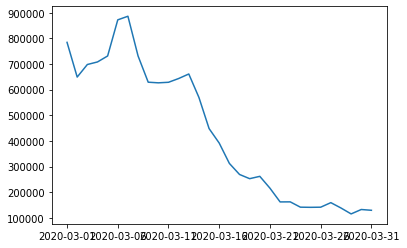

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  

trips = pd.Series(result, name="trips")
trips.plot()